In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, sys

## Get datasets

In [39]:
problems = [
    (100,100),
    (200,200),
    (300,300),
    (100,400),
    (200,450),
    (100,900)
]

def get_df(model_name:str):

    df = None

    for nr_items in [4,7,10]:
     for (width,height) in problems:
        for problem_instance in range(10):
            name = str(nr_items) + "_" + str(width) + "_" + str(height) + "_" + str(problem_instance) 
            path = os.path.join(os.getcwd(), model_name, name + "_0.json")
            if os.path.exists(path):
                df_temp = pd.read_json(path, orient='index').rename(columns={0: name}).T
                df_temp["bin_width"] = width
                df_temp["nr_items"] = nr_items
                if df is None:
                    df = df_temp
                else:
                    df = pd.concat([df, df_temp], axis=0)
    df = df.reset_index().rename(columns={'index': 'problem_id'})
    return df

In [41]:
df_grid_4 = get_df("data/GridSymmetry")
df_grid_8 = get_df("8/GridSymmetry")
df_grid_16 = get_df("16/GridSymmetry")

In [160]:
df_guill = get_df("data/TwoStageGuillotine")
#df_guill[df_guill["bin_width"] == 200][df_guill["bin_length"] == 200]

In [43]:
problem_ids = df_guill["problem_id"]
problem_ids = list(problem_ids)

In [161]:
df_base = get_df("data/Baseline")

/tmp/ipykernel_152/3169860931.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid_4[df_grid_4["nr_items"] == 4][df_grid_4["bin_width"] == width][df_grid_4["bin_length"] == length]
/tmp/ipykernel_152/3169860931.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid_4[df_grid_4["nr_items"] == 4][df_grid_4["bin_width"] == width][df_grid_4["bin_length"] == length]
/tmp/ipykernel_152/3169860931.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/3169860931.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/3169860931.py:12: UserWarning: Boolean Series key will 

Text(0.5, 1.0, 'Performance profile Density')

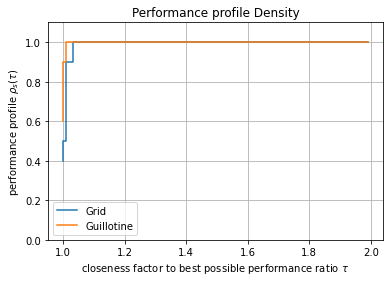

In [16]:

# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 400

df_grid_n = df_grid_4[df_grid_4["nr_items"] == 4][df_grid_4["bin_width"] == width][df_grid_4["bin_length"] == length]
df_guill_n = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_n = df_base[df_base["nr_items"] == 4][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_n[metric]
dd["guill"] = df_guill_n[metric]
dd["base"] = df_base_n[metric]
a = dd[["grid", "guill", "base"]].max(axis=1)
r_grid = 1 / ((- df_grid_n[metric]) / (- a))
r_guill = 1 / ((- df_guill_n[metric]) / (-a ))
r_base = 1 / ((- df_base_n[metric]) / (- a ))

n = 2
s = 0.01


rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(1,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_base))*len([r for r in r_base if r <= t]))


plt.step(np.arange(1,n,s), rho_grid, label="Grid")
plt.step(np.arange(1,n,s), rho_guill, label="Guillotine")
#plt.step(np.arange(1,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/3156472593.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == 200][df_grid["bin_length"] == 200]
/tmp/ipykernel_32008/3156472593.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == 200][df_grid["bin_length"] == 200]
/tmp/ipykernel_32008/3156472593.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == 200][df_guill["bin_length"] == 200]
/tmp/ipykernel_32008/3156472593.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == 200][df_guill["bin_length"] == 200]
/tmp/ipykernel_32008/3156472593.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame

Text(0.5, 1.0, 'Performance profile Density')

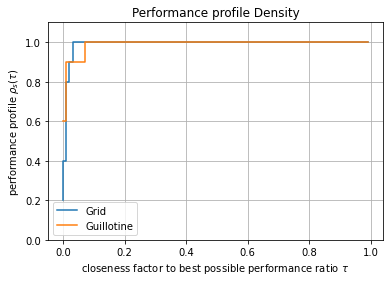

In [84]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == 200][df_grid["bin_length"] == 200]
df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == 200][df_guill["bin_length"] == 200]
df_base_4 = df_base[df_base["nr_items"] == 4][df_base["bin_width"] == 200][df_base["bin_length"] == 200]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]
a = dd[["grid", "guill", "base"]].max(axis=1)
r_grid = ((a - df_grid_4[metric]) )#/ (a))
r_guill = ((a - df_guill_4[metric]) )# / (a ))
r_base = ((a - df_base_4[metric]) )#/ (a ))

n = 1
s = 0.01


rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_base))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
#plt.step(np.arange(1,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

## Quadratic

### 4 items

Text(0.5, 1.0, 'Performance profile Density')

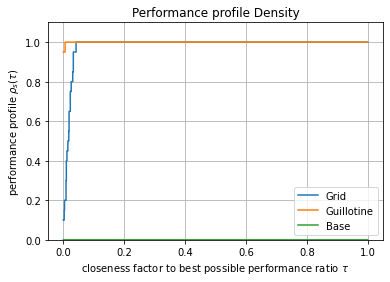

In [224]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 400
nr_items = [10]

df_grid = df_grid_16

df_grid_n = df_grid[(df_grid["nr_items"].isin(nr_items)) & (df_grid["bin_width"]*df_grid["bin_length"] == width*length)]
df_guill_n = df_guill[(df_guill["nr_items"].isin(nr_items)) & (df_guill["bin_width"]*df_guill["bin_length"] == width*length)]
df_base_n = df_base[(df_base["nr_items"].isin(nr_items)) & (df_base["bin_width"]*df_base["bin_length"] == width*length)]

# df_grid_n = df_grid[(df_grid["nr_items"].isin(nr_items)) & (df_grid["bin_width"] == width) & (df_grid["bin_length"] == length)]
# df_guill_n = df_guill[(df_guill["nr_items"].isin(nr_items)) & (df_guill["bin_width"] == width) & (df_guill["bin_length"] == length)]
# df_base_n = df_base[(df_base["nr_items"].isin(nr_items)) & (df_base["bin_width"] == width) & (df_base["bin_length"] == length)]

dd = pd.DataFrame()
dd["grid"] = df_grid_n[metric]
dd["guill"] = df_guill_n[metric]
dd["base"] = df_base_n[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else -1
    a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else -1
    a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else -1
    
    # a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else 60*60
    # a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else 60*60
    # a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else 60*60
    
    a = max([
       a1, a2, a3
    ])
    # a = min([
    #    a1, a2, a3
    # ])
    if a == -1:
        continue
    # if a == (60*60):
    #     continue
    norm = a
    r_grid.append( (a - a1)  / norm)
    r_guill.append( (a - a2)  / norm)
    r_base.append( (a - a3)  / norm)
    
    # r_grid.append( (a1 ) )#/ (a))
    # r_guill.append( (a2 ) )# / (a))
    # r_base.append( (a3 ) )#/ (a))
# print(r_grid)
# print(max(r_grid))
# print(r_guill)
# print(max(r_guill))
# print(r_base)
# print(max(r_base))
    
#s = 1  
s = 0.001
n = 1#max((max(r_grid), max(r_guill), max(r_base))) 
#n = 60*5#max((max(r_grid), max(r_guill) ))#, max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n+s,s):
    rho_grid.append((1/len(r_guill))*len([r for r in r_grid if (r <= t and r >= 0)]))
    rho_guill.append((1/len(r_guill))*len([r for r in r_guill if (r <= t and r >= 0)]))
    rho_base.append((1/len(r_guill))*len([r for r in r_base if (r <= t and r >= 0)]))

# print(rho_grid)
# print(rho_guill)
# print(rho_base)
    
plt.step(np.arange(0,n+s,s), rho_grid, label="Grid", where="post")
plt.step(np.arange(0,n+s,s), rho_guill, label="Guillotine", where="post")
plt.step(np.arange(0,n+s,s), rho_base, label="Base", where="post")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")
#plt.title("Performance profile Solve Time")

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.026789451653411425, 0.057471264367816084, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002750740584003435, 0.0234779957312734, 0.0, 0.0, 0.0, 0.03140046054008795, 0.0, 0.0, 0.0, 0.04348290598290594, 0.007166649843544963, 0.0, 0.0, 0.0, 0.07224576271186445, 0.0, 0.022008547008547073, 0.0826702490441252, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012920157464419131, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Performance profile Density')

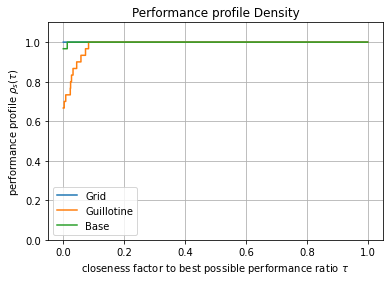

In [179]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 100
nr_items = [4,7,10]

df_grid = df_grid_4

df_grid_n = df_grid[(df_grid["nr_items"].isin(nr_items)) & (df_grid["bin_width"]*df_grid["bin_length"] == width*length)]
df_guill_n = df_guill[(df_guill["nr_items"].isin(nr_items)) & (df_guill["bin_width"]*df_guill["bin_length"] == width*length)]
df_base_n = df_base[(df_base["nr_items"].isin(nr_items)) & (df_base["bin_width"]*df_base["bin_length"] == width*length)]

# df_grid_n = df_grid[(df_grid["nr_items"].isin(nr_items)) & (df_grid["bin_width"] == width) & (df_grid["bin_length"] == length)]
# df_guill_n = df_guill[(df_guill["nr_items"].isin(nr_items)) & (df_guill["bin_width"] == width) & (df_guill["bin_length"] == length)]
# df_base_n = df_base[(df_base["nr_items"].isin(nr_items)) & (df_base["bin_width"] == width) & (df_base["bin_length"] == length)]

dd = pd.DataFrame()
dd["grid"] = df_grid_n[metric]
dd["guill"] = df_guill_n[metric]
dd["base"] = df_base_n[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else -1
    a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else -1
    a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else -1
    
    # a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else 60*60
    # a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else 60*60
    # a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else 60*60
    
    a = max([
       a1, a2, a3
    ])
    # a = min([
    #    a1, a2, a3
    # ])
    if a == -1:
        continue
    # if a == (60*60):
    #     continue
    norm = a
    r_grid.append( (a - a1)  / norm)
    r_guill.append( (a - a2)  / norm)
    r_base.append( (a - a3)  / norm)
    
    # r_grid.append( (a1 ) )#/ (a))
    # r_guill.append( (a2 ) )# / (a))
    # r_base.append( (a3 ) )#/ (a))
print(r_grid)
print(r_guill)
print(r_base)
    
#s = 1  
s = 0.001
n = 1#max((max(r_grid), max(r_guill) ))#, max(r_base))) 
#n = 60*5#max((max(r_grid), max(r_guill) ))#, max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n+s,s):
    rho_grid.append((1/len(r_guill))*len([r for r in r_grid if (r <= t and r >= 0)]))
    rho_guill.append((1/len(r_guill))*len([r for r in r_guill if (r <= t and r >= 0)]))
    rho_base.append((1/len(r_guill))*len([r for r in r_base if (r <= t and r >= 0)]))


plt.step(np.arange(0,n+s,s), rho_grid, label="Grid", where="post")
plt.step(np.arange(0,n+s,s), rho_guill, label="Guillotine", where="post")
plt.step(np.arange(0,n+s,s), rho_base, label="Base", where="post")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")
#plt.title("Performance profile Solve Time")

4_200_200_0
4_200_200_3
4_200_200_4
4_200_200_5


/tmp/ipykernel_152/218957487.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_152/218957487.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/218957487.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_n = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]


Text(0.5, 1.0, 'Performance profile Density')

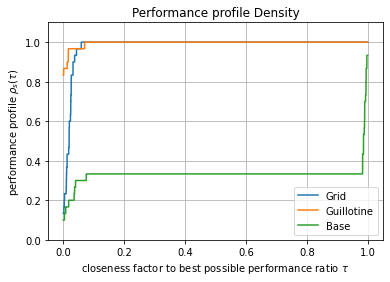

In [21]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 200

df_grid = df_grid_4

df_grid_n = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_n = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_n = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_n[metric]
dd["guill"] = df_guill_n[metric]
dd["base"] = df_base_n[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else 0
    a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else 0
    a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) )# / a)
    r_guill.append( (a - a2) )# / a)
    r_base.append( (a - a3) )#/ a)
    


s = 0.0001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_152/1216749820.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_152/1216749820.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_152/1216749820.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/1216749820.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/1216749820.py:14: UserWarning: Boolean Series key will be reindexed to 

Text(0.5, 1.0, 'Performance profile Density')

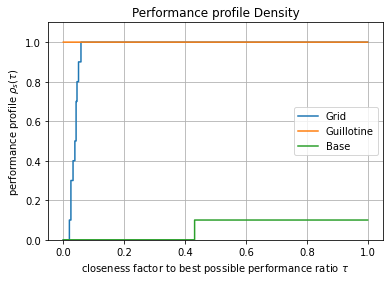

In [29]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 300
length = 300

df_grid = df_grid_4

df_grid_n = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_n = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_n = df_base[df_base["nr_items"] == 4][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else 0
    a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else 0
    a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1)  / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

Text(0.5, 1.0, 'Performance profile Density')

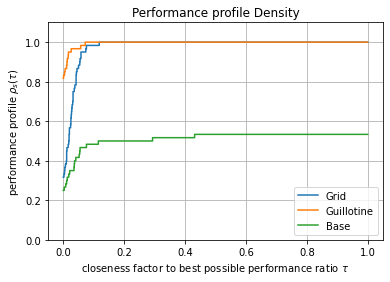

In [177]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"



df_grid_4 = df_grid[df_grid["nr_items"] == 4]
df_guill_4 = df_guill[df_guill["nr_items"] == 4]
df_base_4 = df_base[df_base["nr_items"] == 4]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 7 items

/tmp/ipykernel_32008/457923374.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/457923374.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/457923374.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/457923374.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/457923374.py:13: UserWarning: Boolean

Text(0.5, 1.0, 'Performance profile Density')

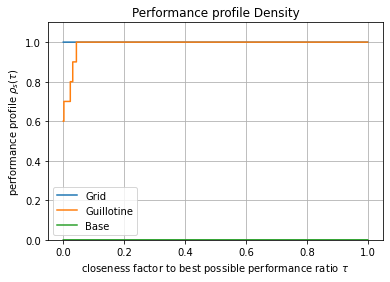

In [157]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 100
nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/1552212712.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1552212712.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1552212712.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1552212712.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1552212712.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

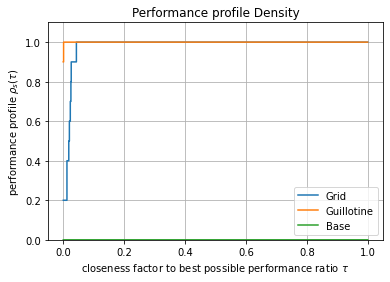

In [158]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 200
nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/1184214906.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1184214906.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1184214906.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1184214906.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1184214906.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

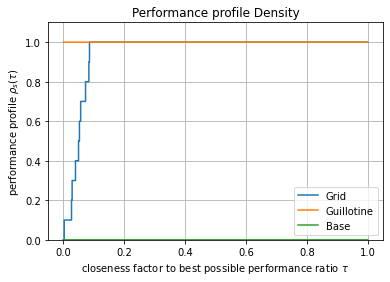

In [159]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 300
length = 300
nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

Text(0.5, 1.0, 'Performance profile Density')

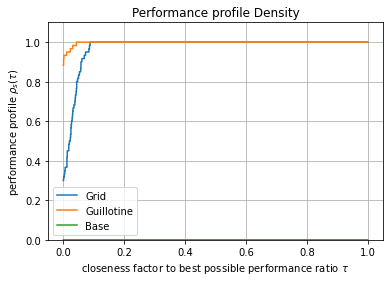

In [160]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items]
df_base_4 = df_base[df_base["nr_items"] == nr_items]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 10 items

/tmp/ipykernel_32008/1437767784.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1437767784.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1437767784.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1437767784.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1437767784.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

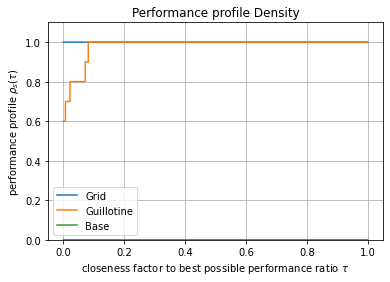

In [161]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 100
nr_items = 10

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_152/3086810991.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_152/3086810991.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/3086810991.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/3086810991.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_n = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]
/tmp/ipykernel_152/3086810991.py:15: UserWarning: Boolean Seri

Text(0.5, 1.0, 'Performance profile Density')

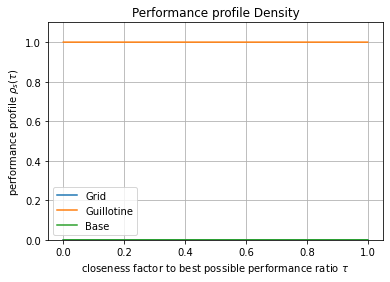

In [37]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 200
nr_items = 10

df_grid = df_grid_8

df_grid_n = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_n = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_n[metric]
dd["guill"] = df_guill_n[metric]
dd["base"] = df_base_n[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else 0
    a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else 0
    a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_152/154128073.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_152/154128073.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/154128073.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/154128073.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_n = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]
/tmp/ipykernel_152/154128073.py:15: UserWarning: Boolean Series ke

Text(0.5, 1.0, 'Performance profile Density')

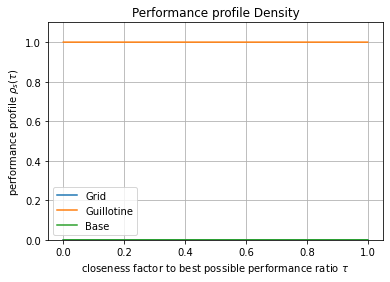

In [35]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 300
length = 300
nr_items = 10

df_grid = df_grid_8

df_grid_n = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_n = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_n[metric]
dd["guill"] = df_guill_n[metric]
dd["base"] = df_base_n[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else 0
    a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else 0
    a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

In [191]:
df_grid_8

,problem_id,nr_constraints,transfer_time,solve_time,density,bin_length,fulfilled,counts,repeats_width,repeats_length,objective,nr_variables,ortools_objective,total_time,bin_width,nr_items
0,10_300_300_1,72562,35.969109,481.708233,0.937356,300,"[0, 15, 0, 3, 1, 0, 5, 0, 1, 0]","[0, 15, 0, 3, 1, 0, 5, 0, 1, 0]","[8, 3, 12, 5, 4, 5, 8, 6, 3, 4, 4, 5, 7, 8, 7,...","[4, 5, 7, 8, 7, 5, 8, 4, 8, 4, 8, 3, 12, 5, 4,...",507425490,2153,507425490,522.063667,300,10
1,10_300_300_2,55339,29.944654,481.184752,0.925478,300,"[10, 0, 8, 0, 0, 0, 1, 3, 2, 4]","[10, 0, 8, 0, 0, 0, 1, 3, 2, 4]","[4, 6, 9, 4, 4, 4, 4, 4, 3, 6, 4, 4, 6, 4, 4, ...","[4, 4, 6, 4, 4, 4, 6, 9, 6, 10, 4, 6, 9, 4, 4,...",603637982,1721,603637982,515.31955,300,10
2,10_300_300_3,78141,40.908073,481.75007,0.935011,300,"[6, 1, 12, 3, 4, 0, 0, 0, 2, 1]","[6, 1, 12, 3, 4, 0, 0, 0, 2, 1]","[15, 3, 4, 5, 12, 4, 6, 3, 8, 4, 6, 7, 4, 10, ...","[6, 7, 4, 10, 5, 4, 3, 6, 8, 6, 15, 3, 4, 5, 1...",526418180,2303,526418180,528.052,300,10
3,10_300_300_4,65521,34.482452,481.487387,0.924022,300,"[1, 2, 5, 2, 1, 2, 14, 0, 0, 9]","[1, 2, 5, 2, 1, 2, 14, 0, 0, 9]","[10, 5, 6, 3, 4, 4, 13, 3, 4, 6, 4, 7, 6, 8, 4...","[4, 7, 6, 8, 4, 6, 7, 6, 5, 3, 10, 5, 6, 3, 4,...",615429473,1973,615429473,520.37312,300,10
4,10_300_300_5,68621,35.43901,481.520769,0.99,300,"[0, 0, 0, 0, 18, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 18, 0, 0, 0, 0, 0]","[4, 7, 7, 13, 3, 7, 5, 5, 6, 8, 4, 5, 8, 6, 6,...","[4, 5, 8, 6, 6, 4, 3, 4, 5, 5, 4, 7, 7, 13, 3,...",81004038,2057,81004038,522.986439,300,10
5,10_300_300_6,56655,30.896106,481.434632,0.948244,300,"[1, 10, 0, 3, 2, 2, 5, 0, 4, 0]","[1, 10, 0, 3, 2, 2, 5, 0, 4, 0]","[8, 6, 4, 6, 4, 7, 5, 3, 8, 6, 3, 3, 8, 5, 6, ...","[3, 3, 8, 5, 6, 5, 7, 7, 5, 3, 8, 6, 4, 6, 4, ...",419226692,1703,419226692,516.758513,300,10
6,10_300_300_7,60299,32.71267,481.341387,0.98,300,"[0, 0, 0, 0, 18, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 18, 0, 0, 0, 0, 0]","[6, 4, 5, 8, 3, 5, 5, 8, 8, 5, 3, 9, 3, 8, 6, ...","[3, 9, 3, 8, 6, 3, 6, 5, 5, 5, 6, 4, 5, 8, 3, ...",162004011,1847,162004011,517.97417,300,10
7,10_300_300_8,46453,26.988525,481.130944,0.938822,300,"[9, 1, 3, 1, 2, 0, 2, 1, 4, 0]","[9, 1, 3, 1, 2, 0, 2, 1, 4, 0]","[3, 8, 3, 4, 5, 6, 8, 4, 6, 3, 5, 4, 6, 9, 3, ...","[5, 4, 6, 9, 3, 3, 4, 4, 7, 5, 3, 8, 3, 4, 5, ...",495545183,1475,495545183,510.370036,300,10
8,10_300_300_9,59710,32.043066,481.399782,0.946422,300,"[0, 0, 1, 0, 1, 0, 1, 16, 0, 0]","[0, 0, 1, 0, 1, 0, 1, 16, 0, 0]","[4, 5, 6, 4, 3, 13, 5, 3, 5, 5, 4, 3, 5, 4, 6,...","[4, 3, 5, 4, 6, 8, 5, 6, 9, 4, 4, 5, 6, 4, 3, ...",433984418,1883,433984418,516.350191,300,10
9,10_100_900_0,70941,37.371225,481.678889,0.972378,900,"[0, 19, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 19, 0, 0, 0, 0, 0, 0, 0, 0]","[2, 2, 2, 2, 1, 2, 4, 3, 2, 2, 2, 1, 1, 1, 1, ...","[20, 9, 12, 16, 16, 33, 19, 24, 37, 32, 20, 18...",223748067,2906,223748067,523.773356,100,10


In [195]:
problem_ids

['4_100_100_0',
 '4_100_100_1',
 '4_100_100_2',
 '4_100_100_3',
 '4_100_100_4',
 '4_100_100_5',
 '4_100_100_6',
 '4_100_100_7',
 '4_100_100_8',
 '4_100_100_9',
 '4_200_200_0',
 '4_200_200_1',
 '4_200_200_2',
 '4_200_200_3',
 '4_200_200_4',
 '4_200_200_5',
 '4_200_200_6',
 '4_200_200_7',
 '4_200_200_8',
 '4_200_200_9',
 '4_300_300_0',
 '4_300_300_1',
 '4_300_300_2',
 '4_300_300_3',
 '4_300_300_4',
 '4_300_300_5',
 '4_300_300_6',
 '4_300_300_7',
 '4_300_300_8',
 '4_300_300_9',
 '4_100_400_0',
 '4_100_400_1',
 '4_100_400_2',
 '4_100_400_3',
 '4_100_400_4',
 '4_100_400_5',
 '4_100_400_6',
 '4_100_400_7',
 '4_100_400_8',
 '4_100_400_9',
 '4_200_450_0',
 '4_200_450_1',
 '4_200_450_2',
 '4_200_450_3',
 '4_200_450_4',
 '4_200_450_5',
 '4_200_450_6',
 '4_200_450_7',
 '4_200_450_8',
 '4_200_450_9',
 '4_100_900_0',
 '4_100_900_1',
 '4_100_900_2',
 '4_100_900_3',
 '4_100_900_4',
 '4_100_900_5',
 '4_100_900_6',
 '4_100_900_7',
 '4_100_900_8',
 '4_100_900_9',
 '7_100_100_0',
 '7_100_100_1',
 '7_100_

0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0.977366666666666 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0


/tmp/ipykernel_152/2408804794.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_152/2408804794.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/2408804794.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/2408804794.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_n = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]
/tmp/ipykernel_152/2408804794.py:15: UserWarning: Boolean Seri

Text(0.5, 1.0, 'Performance profile Density')

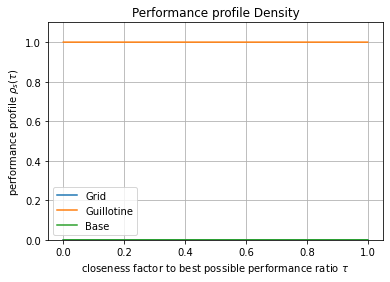

In [23]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 300
length = 300
nr_items = 10

df_grid = df_grid_8

df_grid_n = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_n = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_n[metric]
dd["guill"] = df_guill_n[metric]
dd["base"] = df_base_n[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else 0
    a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else 0
    a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else 0
    print(a1, a2, a3)
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

Text(0.5, 1.0, 'Performance profile Density')

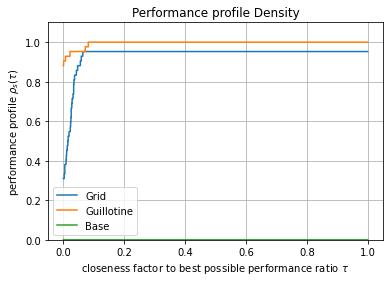

In [165]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

nr_items = 10

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items]
df_base_4 = df_base[df_base["nr_items"] == nr_items]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 100 x 100

/tmp/ipykernel_32008/1458485144.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1458485144.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1458485144.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]


Text(0.5, 1.0, 'Performance profile Density')

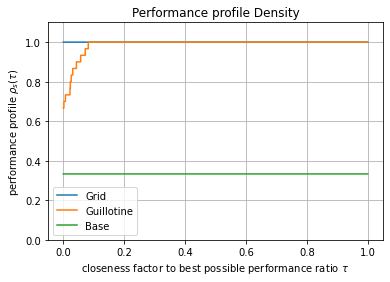

In [178]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 100


df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 200 x 200

4_200_200_0
4_200_200_3
4_200_200_4
4_200_200_5


/tmp/ipykernel_32008/2816079125.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/2816079125.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/2816079125.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]


Text(0.5, 1.0, 'Performance profile Density')

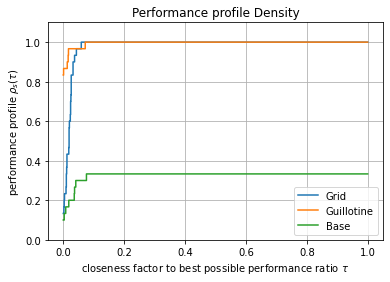

In [179]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 200


df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 300 x 300

/tmp/ipykernel_32008/274557697.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/274557697.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/274557697.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]


Text(0.5, 1.0, 'Performance profile Density')

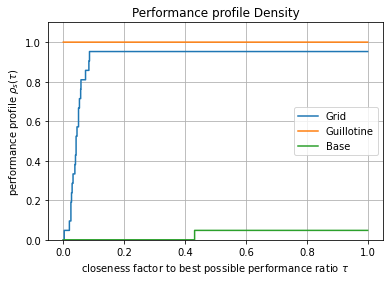

In [180]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 300
length = 300


df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

## Rectangular

### 4 items

/tmp/ipykernel_32008/604123525.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/604123525.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/604123525.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/604123525.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/604123525.py:13: UserWarning: Boolean

Text(0.5, 1.0, 'Performance profile Density')

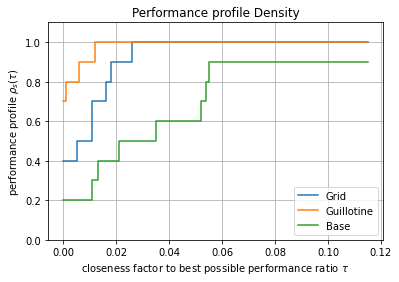

In [166]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 400
nr_items = 4

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/1603705358.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1603705358.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1603705358.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1603705358.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1603705358.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

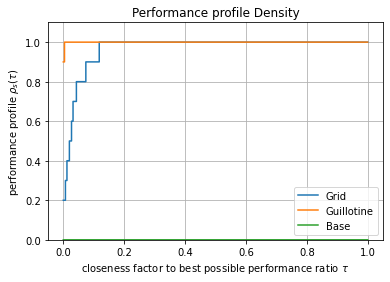

In [167]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 900
nr_items = 4

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/4028012297.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/4028012297.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/4028012297.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/4028012297.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/4028012297.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

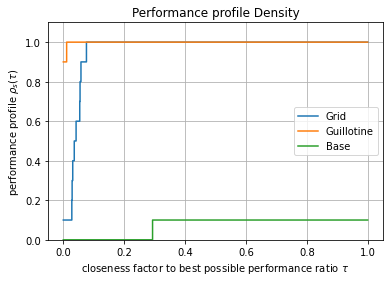

In [168]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 450
nr_items = 4

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 7 items

/tmp/ipykernel_32008/1727364099.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1727364099.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1727364099.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1727364099.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1727364099.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

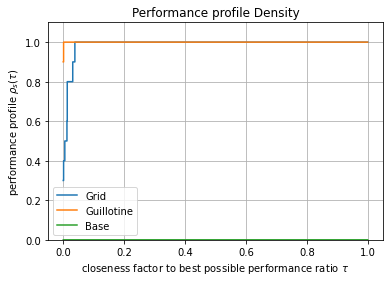

In [169]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 400
nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/2725858247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/2725858247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/2725858247.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/2725858247.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/2725858247.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

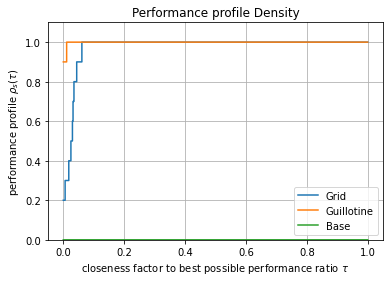

In [170]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 900
nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/607980810.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/607980810.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/607980810.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/607980810.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/607980810.py:13: UserWarning: Boolean

Text(0.5, 1.0, 'Performance profile Density')

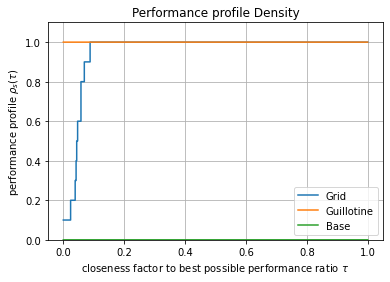

In [171]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 450
nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 10 items

/tmp/ipykernel_32008/2519819489.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/2519819489.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/2519819489.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/2519819489.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/2519819489.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

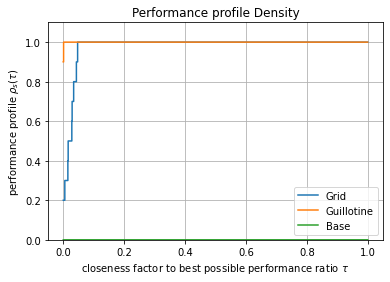

In [172]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 400
nr_items = 10

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_152/1538506254.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_n = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_152/1538506254.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/1538506254.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_152/1538506254.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_n = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]
/tmp/ipykernel_152/1538506254.py:15: UserWarning: Boolean Seri

Text(0.5, 1.0, 'Performance profile Density')

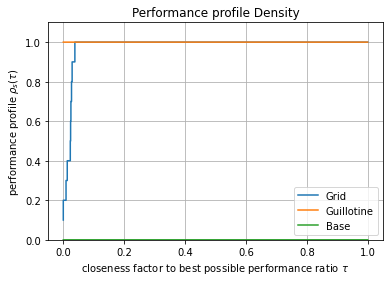

In [34]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 900
nr_items = 10

df_grid = df_grid_16

df_grid_n = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_n = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_n = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_n[metric]
dd["guill"] = df_guill_n[metric]
dd["base"] = df_base_n[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_n[df_grid_n["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_n["problem_id"] == problem_id) else 0
    a2 = df_guill_n[df_guill_n["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_n["problem_id"] == problem_id) else 0
    a3 = df_base_n[df_base_n["problem_id"] == problem_id][metric].iloc[0] if any(df_base_n["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/754333893.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/754333893.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/754333893.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/754333893.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/754333893.py:13: UserWarning: Boolean

Text(0.5, 1.0, 'Performance profile Density')

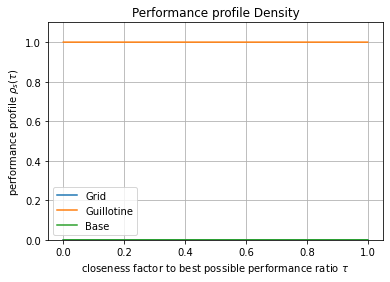

In [174]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 450
nr_items = 10

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 100 x 400

/tmp/ipykernel_32008/4250475801.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/4250475801.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/4250475801.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]


Text(0.5, 1.0, 'Performance profile Density')

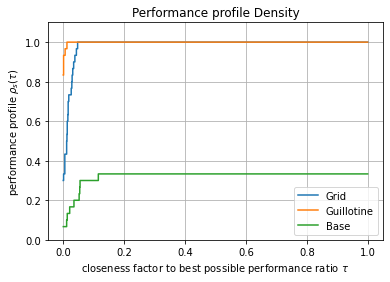

In [181]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 400


df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else -1
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else -1
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else -1
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == -1:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 100 x 900

/tmp/ipykernel_32008/462488497.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/462488497.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/462488497.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]


Text(0.5, 1.0, 'Performance profile Density')

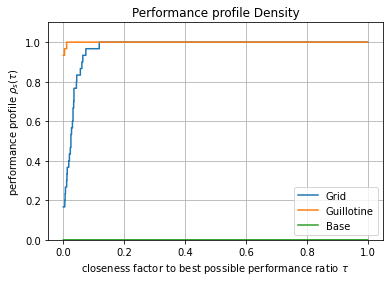

In [182]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 900


df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

### 200 x 450

/tmp/ipykernel_32008/2026917565.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/2026917565.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/2026917565.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]


Text(0.5, 1.0, 'Performance profile Density')

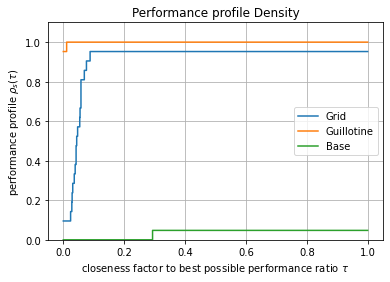

In [183]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 450


df_grid_4 = df_grid[df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)
    


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) 

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

## Rest

/tmp/ipykernel_32008/752427068.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/752427068.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/752427068.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/752427068.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/752427068.py:12: UserWarning: Boolean Series key will be reindexe

Text(0.5, 1.0, 'Performance profile Density')

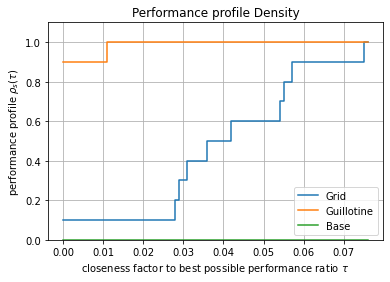

In [110]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 450

df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == 4][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]
a = dd[["grid", "guill", "base"]].max(axis=1)
r_grid = ((a - df_grid_4[metric]) )#/ (a))
r_guill = ((a - df_guill_4[metric]) )# / (a ))
r_base = ((a - df_base_4[metric]) )#/ (a ))


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) + s

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_grid))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/2882293223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/2882293223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/2882293223.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/2882293223.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/2882293223.py:12: UserWarning: Boolean Series key will be rei

Text(0.5, 1.0, 'Performance profile Density')

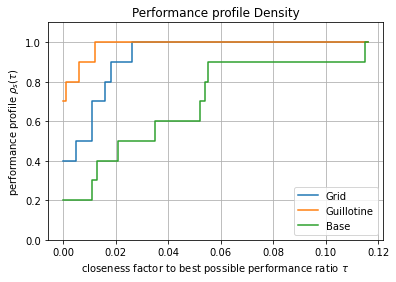

In [147]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 400

df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == 4][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]

r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) / a)
    r_guill.append( (a - a2) / a)
    r_base.append( (a - a3) / a)


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) + s

rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_base))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/364401564.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/364401564.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/364401564.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/364401564.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/364401564.py:12: UserWarning: Boolean Series key will be reindexe

Text(0.5, 1.0, 'Performance profile Density')

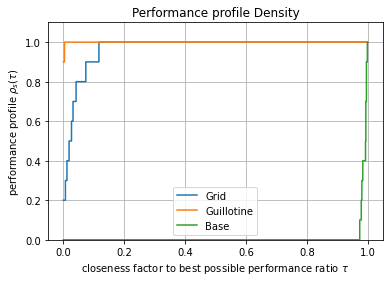

In [149]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 900

df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == 4][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]
a = dd[["grid", "guill", "base"]].max(axis=1)


r_grid = []
r_guill = []
r_base = []

for problem_id in problem_ids:
    a1 = df_grid_4[df_grid_4["problem_id"] == problem_id][metric].iloc[0] if any(df_grid_4["problem_id"] == problem_id) else 0
    a2 = df_guill_4[df_guill_4["problem_id"] == problem_id][metric].iloc[0] if any(df_guill_4["problem_id"] == problem_id) else 0
    a3 = df_base_4[df_base_4["problem_id"] == problem_id][metric].iloc[0] if any(df_base_4["problem_id"] == problem_id) else 0
    if a1 < a3:
        print(problem_id)
    a = max([
       a1, a2, a3
    ])
    if a == 0:
        continue
    r_grid.append( (a - a1) )
    r_guill.append( (a - a2))
    r_base.append( (a - a3) )

s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) + s


rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_base))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
plt.step(np.arange(0,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/1276258046.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1276258046.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1276258046.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1276258046.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1276258046.py:12: UserWarning: Boolean Series key will be rei

Text(0.5, 1.0, 'Performance profile Density')

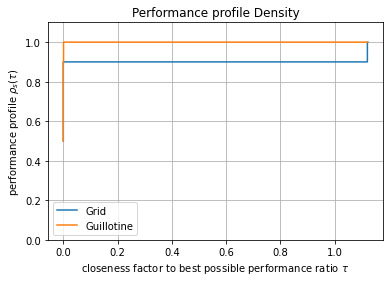

In [102]:
# metric = "transfer_time"
metric = "solve_time"
# metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 900

df_grid_4 = df_grid[df_grid["nr_items"] == 4][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == 4][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == 4][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]
a = dd[["grid", "guill", "base"]].min(axis=1)
r_grid = ((df_grid_4[metric] - a)  / (a))
r_guill = ((df_guill_4[metric] - a)  / (a ))
r_base = ((df_base_4[metric] - a) / (a ))

s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) + s


rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_base))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
#plt.step(np.arange(1,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

Text(0.5, 1.0, 'Performance profile Density')

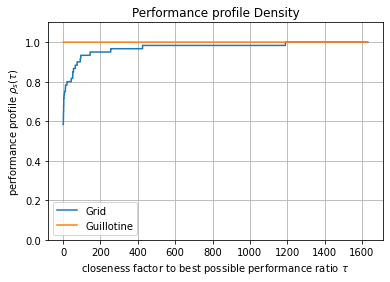

In [103]:
# metric = "transfer_time"
metric = "solve_time"
#metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

df_grid_4 = df_grid[df_grid["nr_items"] == 4]#[df_grid["bin_width"] == 100]#[df_grid["bin_length"] == 100]
df_guill_4 = df_guill[df_guill["nr_items"] == 4]#[df_guill["bin_width"] == 100]#[df_guill["bin_length"] == 100]
df_base_4 = df_base[df_base["nr_items"] == 4]#[df_base["bin_width"] == 100]#[df_base["bin_length"] == 100]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]
a = dd[["grid", "guill", "base"]].min(axis=1)
r_grid = (df_grid_4[metric] - a) / (a)
r_guill = (df_guill_4[metric] - a) / (a)
r_base = (df_base_4[metric] - a) / (a)

upper = max((max(r_grid), max(r_guill), max(r_base)))
n = upper
s = 0.01


rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(1,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_base))*len([r for r in r_base if r <= t]))


plt.step(np.arange(1,n,s), rho_grid, label="Grid")
plt.step(np.arange(1,n,s), rho_guill, label="Guillotine")
#plt.step(np.arange(1,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/1236845964.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1236845964.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1236845964.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1236845964.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1236845964.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

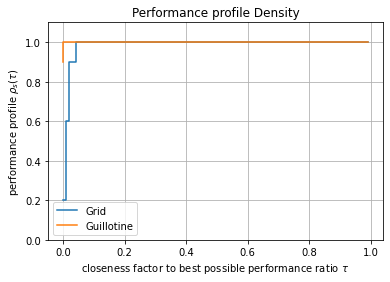

In [89]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 200
length = 200
nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]
a = dd[["grid", "guill", "base"]].max(axis=1)
r_grid = ((a - df_grid_4[metric]) )#/ (a))
r_guill = ((a - df_guill_4[metric]) )# / (a ))
r_base = ((a - df_base_4[metric]) )#/ (a ))

n = 1
s = 0.01


rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_base))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
#plt.step(np.arange(1,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")

/tmp/ipykernel_32008/1914394894.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1914394894.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
/tmp/ipykernel_32008/1914394894.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1914394894.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
/tmp/ipykernel_32008/1914394894.py:13: UserWarning: Bo

Text(0.5, 1.0, 'Performance profile Density')

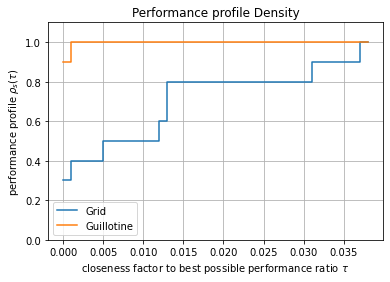

In [96]:
# metric = "transfer_time"
metric = "solve_time"
metric = "density"
# metric = "nr_constraints"
# metric = "nr_variables"

width = 100
length = 400
nr_items = 7

df_grid_4 = df_grid[df_grid["nr_items"] == nr_items][df_grid["bin_width"] == width][df_grid["bin_length"] == length]
df_guill_4 = df_guill[df_guill["nr_items"] == nr_items][df_guill["bin_width"] == width][df_guill["bin_length"] == length]
df_base_4 = df_base[df_base["nr_items"] == nr_items][df_base["bin_width"] == width][df_base["bin_length"] == length]

dd = pd.DataFrame()
dd["grid"] = df_grid_4[metric]
dd["guill"] = df_guill_4[metric]
dd["base"] = df_base_4[metric]
a = dd[["grid", "guill", "base"]].max(axis=1)
r_grid = ((a - df_grid_4[metric]) )#/ (a))
r_guill = ((a - df_guill_4[metric]) )# / (a ))
r_base = ((a - df_base_4[metric]) )#/ (a ))


s = 0.001
n = max((max(r_grid), max(r_guill), max(r_base))) + s


rho_grid = []
rho_guill = []
rho_base = []
for t in np.arange(0,n,s):
    rho_grid.append((1/len(r_grid))*len([r for r in r_grid if r <= t]))
    rho_guill.append((1/len(r_grid))*len([r for r in r_guill if r <= t]))
    rho_base.append((1/len(r_base))*len([r for r in r_base if r <= t]))


plt.step(np.arange(0,n,s), rho_grid, label="Grid")
plt.step(np.arange(0,n,s), rho_guill, label="Guillotine")
#plt.step(np.arange(1,n,s), rho_base, label="Base")


plt.xlabel(r"closeness factor to best possible performance ratio $\tau$")
plt.ylabel(r"performance profile $\rho_s(\tau)$")
plt.legend()
plt.grid()
plt.ylim(0,1.1)
# rho = cumulative distribution function for the performance ratio
plt.title("Performance profile Density")